
## HW 2 ##

The following program implements two quantum circuits: The Hadamard Test and The SWAP test

###The Hadamard Test###

The function `ProbZeroHadamard` simulates a Hadamard test with a qubit `psi`  and a single qubit unitary `U`. Then it returns the probability of obtaining `0` with a Von Neumann measurement by projecting it onto $P$ and returning the norm of the projected vector. $P = \left|0\right>\hspace{-0.1cm}\left<0\right|\otimes I$ .

In [0]:
#x is the state of the quantum system
def ProbZeroHadamard(psi, U):
  x = np.matmul(np.kron(Hadamard2, Identity2), np.kron([1, 0], psi))
  controlledU = np.add(np.kron(np.outer(ket0, ket0), Identity2), np.kron(np.outer(ket1, ket1), U))
  x = np.matmul(controlledU, x)
  x = np.matmul(np.kron(Hadamard2, Identity2), x)

  Projector = np.kron(np.outer(ket0,ket0), Identity2)
  projected = np.matmul(Projector, x)
  prob0 = np.matmul(projected.conj().T, projected)
  return prob0

We use $\left|\psi\right> = \left|0\right>$ and $U =\ $ the orthogonal matrix that describes the rotation by $2\pi\theta$. I.E. 
$$U = 
\begin{bmatrix}
  \cos{2\pi\theta} & -\sin{2\pi\theta}\\
  \sin{2\pi\theta} & \cos{2\pi\theta}
\end{bmatrix}.$$ The probability of the Hadamard test outputting zero is plotted for $\theta\in \left[0,1\right)$ using the simulated probability. Then, the expected probability is also plotted using Pr(0)$\ = \frac{1}{2}\left(1+Re\left<\psi\right|U\left|\psi\right>\right)$.

###The SWAP Test###
The function `ProbZeroSWAP` simulates a SWAP test with qubits `psi1` and `psi2`. The SWAP test is a special case of the Hadamard test. In a SWAP test, the controlled gate is the SWAP gate. $S$ is the SWAP gate.
$$S = \left|00\right>\hspace{-0.1cm}\left<00\right|+\left|01\right>\hspace{-0.1cm}\left<10\right|+\left|10\right>\hspace{-0.1cm}\left<01\right|+\left|11\right>\hspace{-0.1cm}\left<11\right|=
\begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 0 & 1 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 0 & 1
\end{bmatrix}$$ 

In [0]:
#x is the state of the quantum system
def ProbZeroSWAP(psi, psi2):
  x = np.matmul(np.kron(Hadamard2, np.eye(4)), np.kron([1, 0], np.kron(psi, psi2)))
  controlledS = np.add(np.kron(np.outer(ket0, ket0), np.eye(4)), np.kron(np.outer(ket1, ket1), SWAP))
  x = np.matmul(controlledS, x)
  x = np.matmul(np.kron(Hadamard2, np.eye(4)), x)

  Projector = np.kron(np.outer(ket0,ket0), np.eye(4))
  projected = np.matmul(Projector, x)
  prob0 = np.matmul(projected.conj().T, projected)
  return prob0

We use $\left|\psi_1\right> = \left|0\right>$ and $\left|\psi_2\right> = \cos\left(2\pi\theta\right)\left|0\right> + \sin\left(2\pi\theta\right)\left|1\right>$.

The probability of the SWAP test outputting zero is plotted for $\theta\in \left[0,1\right)$ using the simulated probability. Then, the expected probability is once again plotted using Pr(0)$\ = \frac{1}{2}\left(1+Re\left<\psi\right|S\left|\psi\right>\right)$, where $\left|\psi\right> = \left|\psi1\right> \otimes \left|\psi2\right>$. 

See the full code and its output below.

###Full Code###

Problem 1


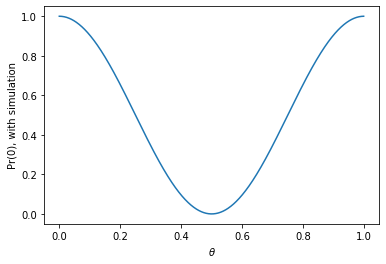

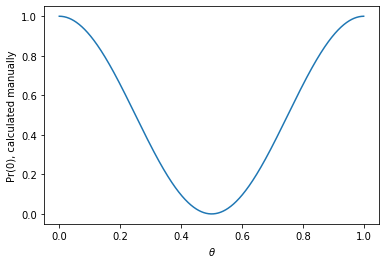

Problem 2


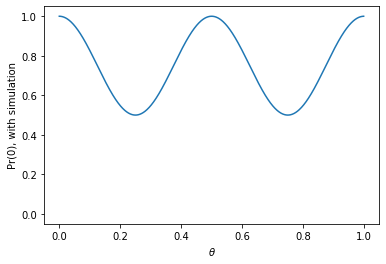

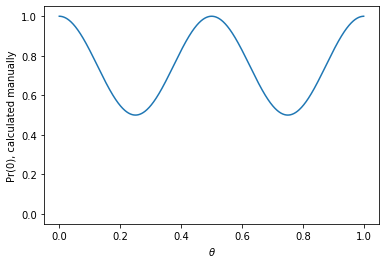

In [17]:
import math
import matplotlib.pyplot as plt
import numpy as np

Hadamard2 = np.multiply(1/math.sqrt(2), [[1, 1],
                                         [1,-1]])
Identity2 = np.eye(2)
ket0 = [1, 0]
ket1 = [0, 1]

def ProbZeroHadamard(psi, U):
  x = np.matmul(np.kron(Hadamard2, Identity2), np.kron([1, 0], psi))
  controlledU = np.add(np.kron(np.outer(ket0, ket0), Identity2), np.kron(np.outer(ket1, ket1), U))
  x = np.matmul(controlledU, x)
  x = np.matmul(np.kron(Hadamard2, Identity2), x)

  Projector = np.kron(np.outer(ket0,ket0), Identity2)
  projected = np.matmul(Projector, x)
  prob0 = np.matmul(projected.conj().T, projected)
  return prob0


Resolution = 1000;
x = []
y = []
z = []
r = []

U = [[1, 0],
     [0, 1]]
#psi = np.multiply(1/math.sqrt(2),[1, 1]) <-- Interesting Case
psi = [1, 0]

for i in range(Resolution):
  theta = 1/Resolution * i
  U = [[math.cos(theta*2*math.pi),-math.sin(theta*2*math.pi)],
       [math.sin(theta*2*math.pi), math.cos(theta*2*math.pi)]]
  x.append(theta)
  y.append(ProbZeroHadamard(psi, U))
  z.append(0.5*(1+np.matmul(np.conj(np.transpose(psi)), np.matmul(U, psi))))

print("Problem 1")
plt.ylim(-0.05, 1.05)
plt.plot(x,y)
plt.xlabel(r"$\theta$")
plt.ylabel(r"Pr(0), with simulation")
plt.show()
plt.ylim(-0.05, 1.05)
plt.xlabel(r"$\theta$")
plt.ylabel(r"Pr(0), calculated manually")
plt.plot(x,z)
plt.show()

x = []
y = []
z = []

SWAP = [[1, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 1]]

def ProbZeroSWAP(psi, psi2):
  x = np.matmul(np.kron(Hadamard2, np.eye(4)), np.kron([1, 0], np.kron(psi, psi2)))
  controlledS = np.add(np.kron(np.outer(ket0, ket0), np.eye(4)), np.kron(np.outer(ket1, ket1), SWAP))
  x = np.matmul(controlledS, x)
  x = np.matmul(np.kron(Hadamard2, np.eye(4)), x)

  Projector = np.kron(np.outer(ket0,ket0), np.eye(4))
  projected = np.matmul(Projector, x)
  prob0 = np.matmul(projected.conj().T, projected)
  return prob0

for i in range(Resolution):
  theta = 1/Resolution * i
  psi2 = [math.cos(theta * 2 * math.pi), math.sin(theta * 2 * math.pi)]

  x.append(theta)
  y.append(ProbZeroSWAP(psi, psi2))
  z.append(0.5*(1+np.matmul(np.kron(psi, psi2).T.conj(), np.matmul(SWAP, np.kron(psi, psi2)))))


print("Problem 2")
plt.ylim(-0.05, 1.05)
plt.plot(x,y)
plt.xlabel(r"$\theta$")
plt.ylabel(r"Pr(0), with simulation")
plt.show()
plt.ylim(-0.05, 1.05)
plt.xlabel(r"$\theta$")
plt.ylabel(r"Pr(0), calculated manually")
plt.plot(x,z)
plt.show()

##Extra##

Pr(0) plotted with respect to theta for SWAP test, both `psi1` and `psi2` are allowed to vary.

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Open folder on left, go to rotation.gif
This is an interesting graph, I need to think more about why it is this way.


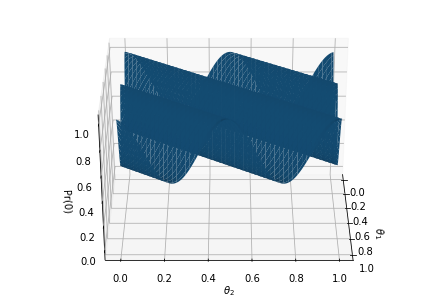

In [71]:
print()
import math
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

Resolution = 100

x = np.eye(Resolution)
y = np.eye(Resolution)
z = np.eye(Resolution)

Hadamard2 = np.multiply(1/math.sqrt(2), [[1, 1],
                                         [1,-1]])
Identity2 = np.eye(2)
ket0 = [1, 0]
ket1 = [0, 1]
SWAP = [[1, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 1]]

def ProbZeroSWAP(psi, psi2):
  x = np.matmul(np.kron(Hadamard2, np.eye(4)), np.kron([1, 0], np.kron(psi, psi2)))
  controlledS = np.add(np.kron(np.outer(ket0, ket0), np.eye(4)), np.kron(np.outer(ket1, ket1), SWAP))
  x = np.matmul(controlledS, x)
  x = np.matmul(np.kron(Hadamard2, np.eye(4)), x)

  Projector = np.kron(np.outer(ket0,ket0), np.eye(4))
  projected = np.matmul(Projector, x)
  prob0 = np.matmul(projected.conj().T, projected)
  return prob0

for i in range(Resolution):
  for j in range(Resolution):
    theta1 = 1/Resolution * i
    theta2 = 1/Resolution * j
    psi1 = [math.cos(theta1 * 2 * math.pi), math.sin(theta1 * 2 * math.pi)]
    psi2 = [math.cos(theta2 * 2 * math.pi), math.sin(theta2 * 2 * math.pi)]

    x[i,j] = theta1
    y[i,j] = theta2
    z[i, j] = (ProbZeroSWAP(psi1, psi2))
    #z[i, j] = (0.5*(1+np.matmul(np.kron(psi1, psi2).T.conj(), np.matmul(SWAP, np.kron(psi1, psi2)))))

def rotate(angle):
    ax.view_init(azim=angle)

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel(r"$\theta_1$")
ax.set_ylabel(r"$\theta_2$")
ax.set_zlabel("Pr(0)")
ax.set_zlim(-0.05, 1.05)
ax.plot_surface(x,y,z)

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)
rot_animation.save('rotation.gif', dpi=80, writer='imagemagick')

print("Open folder on left, go to rotation.gif\nThis is an interesting graph, I need to think more about why it is this way.")